<a href="https://colab.research.google.com/github/mrbarron3/fwe458/blob/main/Homework7/Homework7_Barron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# imports
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC

## Question 1

In [2]:
# load the iris dataset
X, y = datasets.load_iris(return_X_y=True)
print(len(y))

# 0 == setosa, 1 == versicolor, 2 == viriginica
# change the 1s to 2s, then 0s to 1s, then 2s to 0s, to make this into a binary class problem (1 == setosa, 0 != setosa)
y[y == 1] = 2
y[y == 0] = 1
y[y == 2] = 0

150


In [3]:
# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# verify there is a mix of 0s and 1s in the testing data
y_test

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1])

In [4]:
# initiate the logistic regression model
logreg = LogisticRegression()

# fit the model with training data
logreg.fit(X_train, y_train)

# predict values on the testing dataset
y_pred = logreg.predict(X_test)

In [5]:
# compare predicted values to actual values via the confusion matrix
mtx = metrics.confusion_matrix(y_test, y_pred)

# TP   |   FP
# FN   |   TN
mtx

array([[29,  0],
       [ 0, 16]])

In [6]:
# calculate scores from the matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"The accuracy score is: {accuracy}")
print(f"The precision score is: {precision}")
print(f"The recall score is: {recall}")
print(f"The f1 score is: {f1}")

The accuracy score is: 1.0
The precision score is: 1.0
The recall score is: 1.0
The f1 score is: 1.0


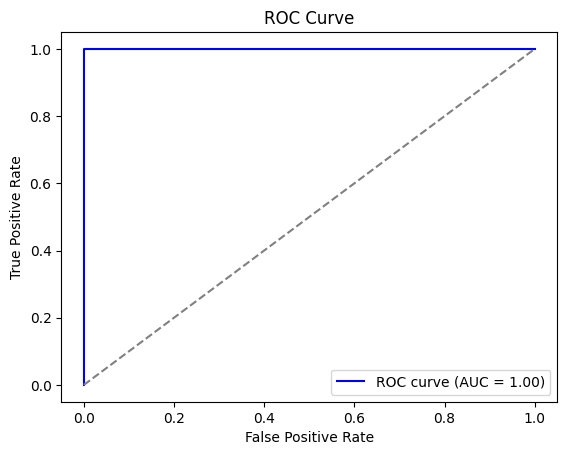

The AUC is: 1.0


In [7]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

# plot the ROC curve and Area Under Curve
fig, ax = plt.subplots()

ax.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
ax.plot([0, 1], [0, 1], linestyle='--', color='gray')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.legend()

plt.show()

print(f"The AUC is: {auc_score}")

The ROC curve shows that the fpr is always 0 and the tpr is always 1. As such, the area under the curve is 1, which is as high this metric goes, and is known as "perfect classification". Our logistic regression model performed way better than just guessing, which would have resulted in an AUC value of 0.5.

## Question 2

In [8]:
# load the wine dataset
wine_X, wine_y = datasets.load_wine(return_X_y=True)
print(len(wine_y))

wine_y

178


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [9]:
# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(wine_X, wine_y, test_size=0.25, random_state=0)

# verify there is a mix of 0s, 1s, and 2s in the testing data
y_test

array([0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 0, 0, 1, 1,
       1])

In [10]:
# train three SVM models, each using a different kernel (linear, RBF, and polynomial).
model0 = SVC(kernel = 'linear').fit(wine_X, wine_y)
pred0 = model0.predict(wine_X)

model1 = SVC(kernel = 'rbf').fit(wine_X, wine_y)
pred1 = model1.predict(wine_X)

model2 = SVC(kernel = 'poly').fit(wine_X, wine_y)
pred2 = model2.predict(wine_X)

# add all predictions to a list for later use
predictions = []
predictions.append(pred0)
predictions.append(pred1)
predictions.append(pred2)
model_types = ['linear', 'RBF', 'polynomial']

In [11]:
def performance(y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)

  # average = 'macro' argument calculates metrics for each label and finds their unweighted mean
  precision = precision_score(y_test, y_pred, average = 'macro')
  recall = recall_score(y_test, y_pred, average = 'macro')
  f1 = f1_score(y_test, y_pred, average = 'macro')

  print(f"   The accuracy score is: {accuracy}")
  print(f"   The precision score is: {precision}")
  print(f"   The recall score is: {recall}")
  print(f"   The f1 score is: {f1}")

In [12]:
# display the performance of each model
for i, pred in enumerate(predictions):
  print(f"The performance of model{i} ({model_types[i]}) is:")
  performance(wine_y, pred)

The performance of model0 (linear) is:
   The accuracy score is: 0.9943820224719101
   The precision score is: 0.9931972789115647
   The recall score is: 0.9953051643192489
   The f1 score is: 0.9941995076893081
The performance of model1 (RBF) is:
   The accuracy score is: 0.7078651685393258
   The precision score is: 0.691563088512241
   The recall score is: 0.690694543911302
   The f1 score is: 0.690648522963965
The performance of model2 (polynomial) is:
   The accuracy score is: 0.6797752808988764
   The precision score is: 0.6166129032258064
   The recall score is: 0.632181507121827
   The f1 score is: 0.596226418893883


Based on these performance metrics using macro average for precision, recall, and f1, the linear SVM model is the best choice for us to use to predict a wine's class. All performance metrics given above for the linear model are greater than their rbf and polynomial counterparts. Based on these values, the wine data must be mostly linearly separable before it goes into the model for these performance metrics to come out as such. The rbf and polynomial kernal would have performed better than the linear kernel if the data was not already linearly separable. Using either of these as the "kernal trick" maps the data into a higher dimensional space where a linear decision boundary can be created.